About dataset


# **Cancer**

# **Benign or malignant cancer prediction**

Cancer data typically refer to datasets that contain information about tumors, their characteristics, and whether they are benign (non-cancerous) or malignant (cancerous). These datasets often include various features or attributes that describe tumors, such as size, shape, texture, margins, and other medical imaging characteristics
These datasets are valuable for developing predictive models to assist in diagnosing cancer based on specific attributes of tumors

**importing Necessary packages(or Library)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Listing The Directory item

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Cancer_Data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Drop Colums






In [ ]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
df
# droping column(Unnamed: 32 &id)since it does not contribute to accuracy

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Filling Missing Values

In [ ]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

shape of the dataset

In [ ]:
df.shape

(569, 31)

TO check the Data type

In [ ]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Label Encoder






In [ ]:
from sklearn.preprocessing import LabelEncoder # used to covert cateogarical variables(variables that can take on a limited,fixed number of cateogaries)into numerical variable(represent numerical measurements or quantities)
le=LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Separate X And Y

In [ ]:
#features (independent variables)
X=df.iloc[:,1:] #By using this code, you are essentially creating a new DataFrame X that contains all the rows and all the columns from the original DataFrame df, except the 1st column
X



#target(dependent variable)
y=df.iloc[:,0] #By using this code, you are selecting the first column of the DataFrame df and assigning it to the variable y


Value Count

In [ ]:
y.value_counts() # to know the imbalance b/w output variables in the target variables (theres not a large difference b\w ouput variables )

0    357
1    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

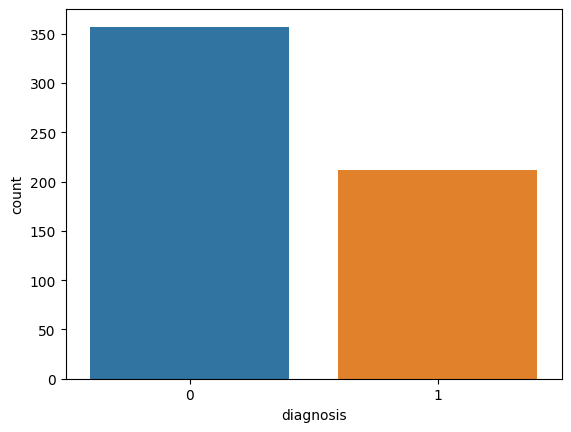

In [ ]:
sns.countplot(x="diagnosis",data=df)

In [ ]:
df_div = df.iloc[:,1:11]
df_div2 = df.iloc[:,11:21]
df_div3 = df.iloc[:,21:]
df_div['diagnosis'] = df.diagnosis
df_div2['diagnosis'] = df.diagnosis
df_div3['diagnosis'] = df.diagnosis
# This code separates the original DataFrame df into three parts based on column indices and
#  then adds a 'diagnosis' column to each of these parts, presumably for further analysis or processing. The 'diagnosis' column  to be duplicated across these sliced DataFrames,
# containing the same data as the original 'diagnosis' column from the original DataFrame

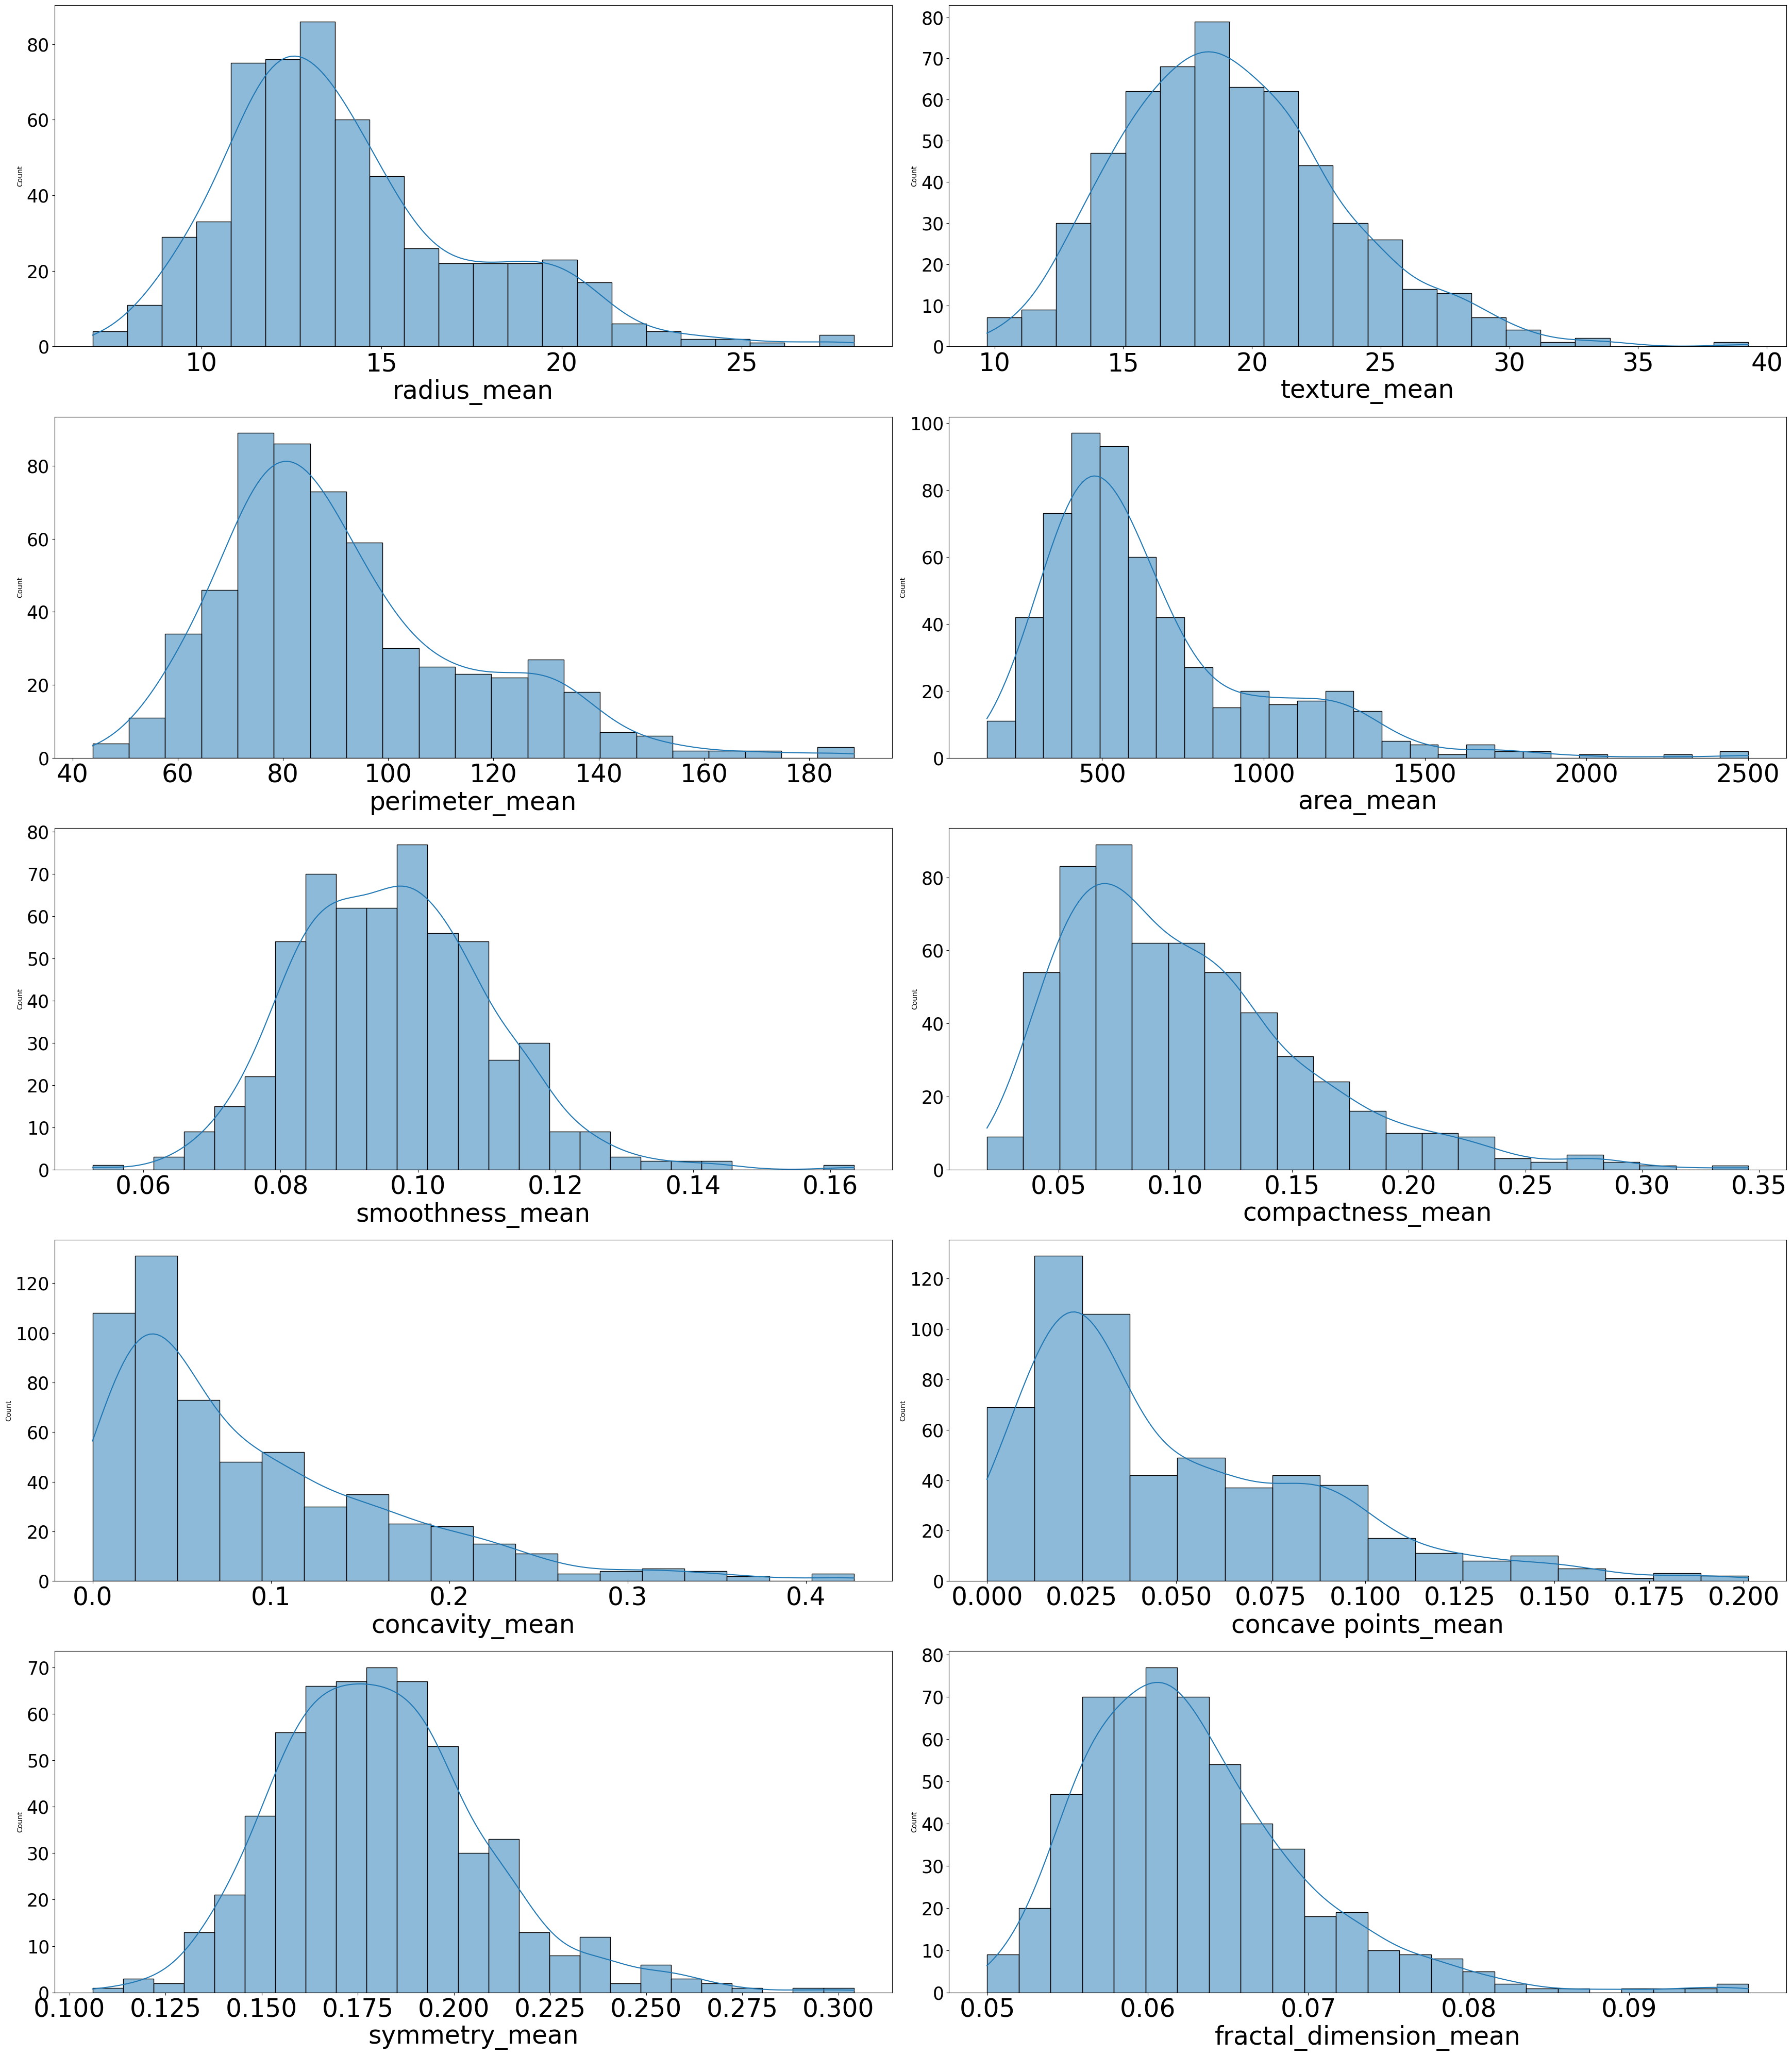

In [ ]:

fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)    #initializes a grid of subplots with 2 columns and 5 rows, creating a total of 10 subplots arranged in a grid
axs = axs.flatten() #flattens the 2D array of subplots into a 1D array for easier iteration
for i,col in enumerate(df_div.drop(columns = 'diagnosis').columns) :          #loop iterates through each column in df_div, excluding the 'diagnosis' column
    sns.histplot(x = col,data = df_div ,kde=True, ax=axs[i])            #kde=True adds a kernel density estimation plot alongside the histogram bars
    axs[i].set_xlabel(col,fontsize=35)                                 #sets the x-axis label for the subplot
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)                         #set the size of the tick labels on the x and y axes respectively

plt.tight_layout()                                        #adjusts subplot parameters to give specified padding
plt.show()

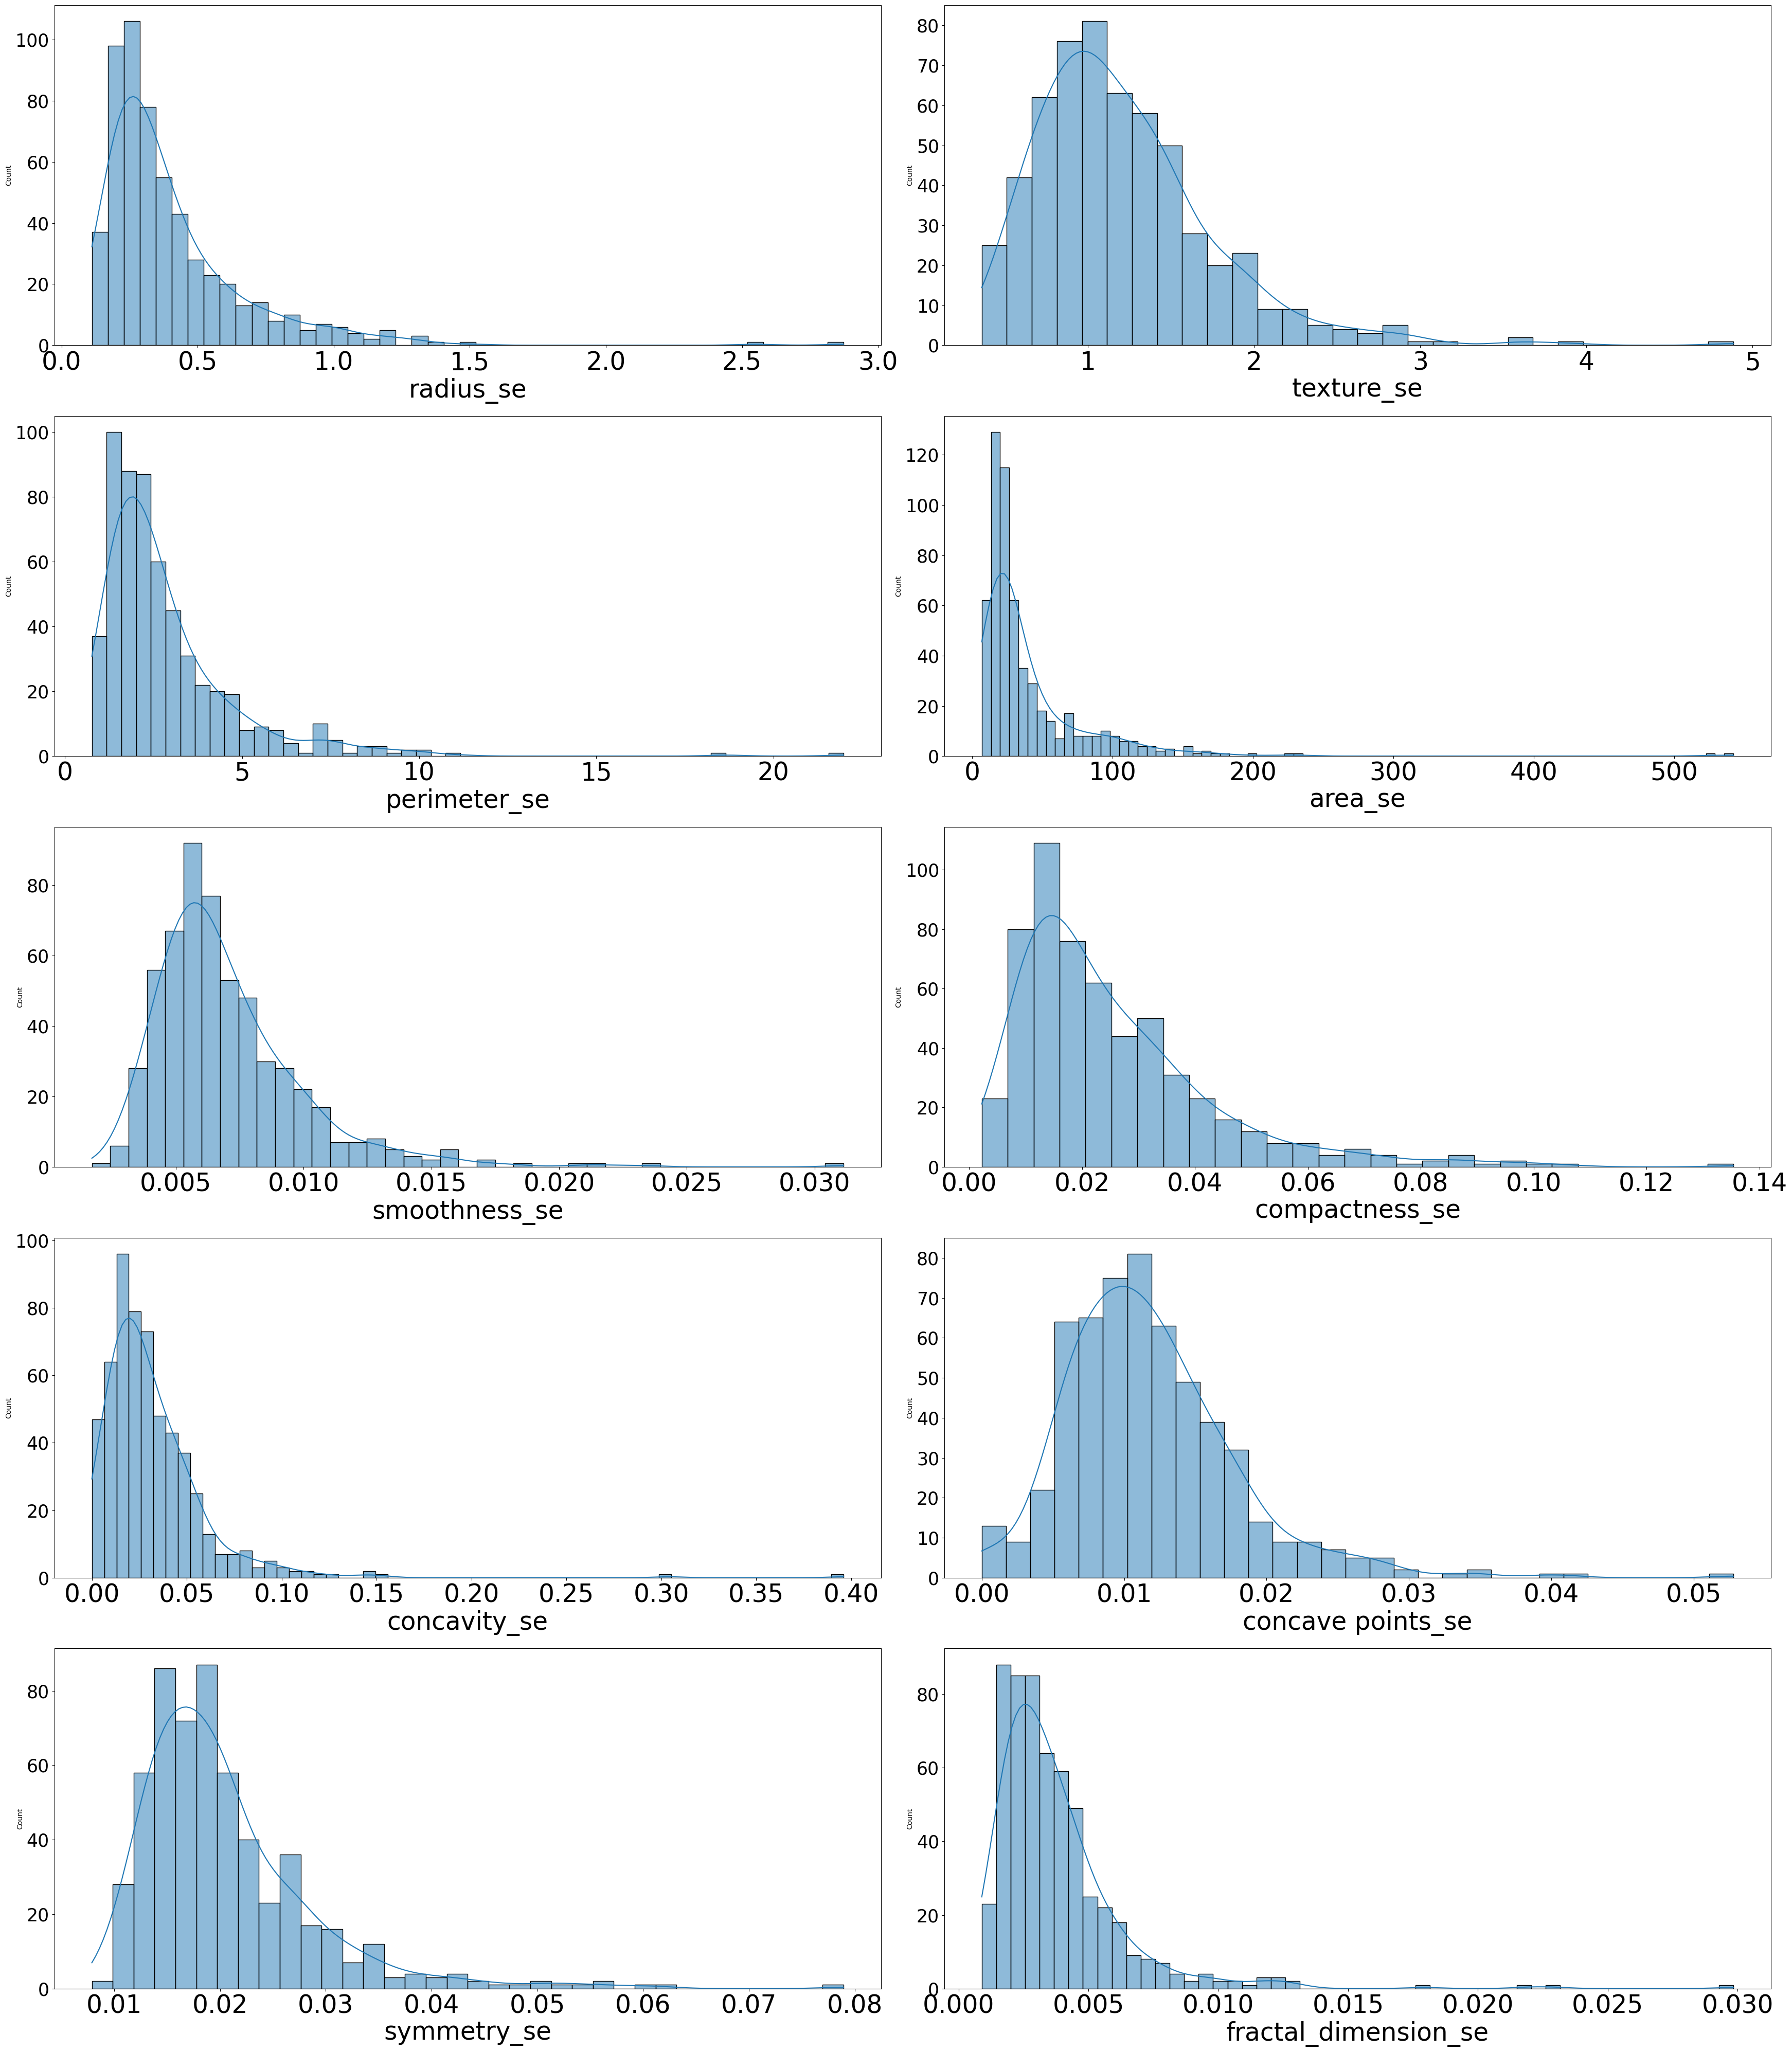

In [ ]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_div2.drop(columns = 'diagnosis').columns) :
    sns.histplot(x = col,data = df_div2 ,kde=True, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)

plt.tight_layout()
plt.show()

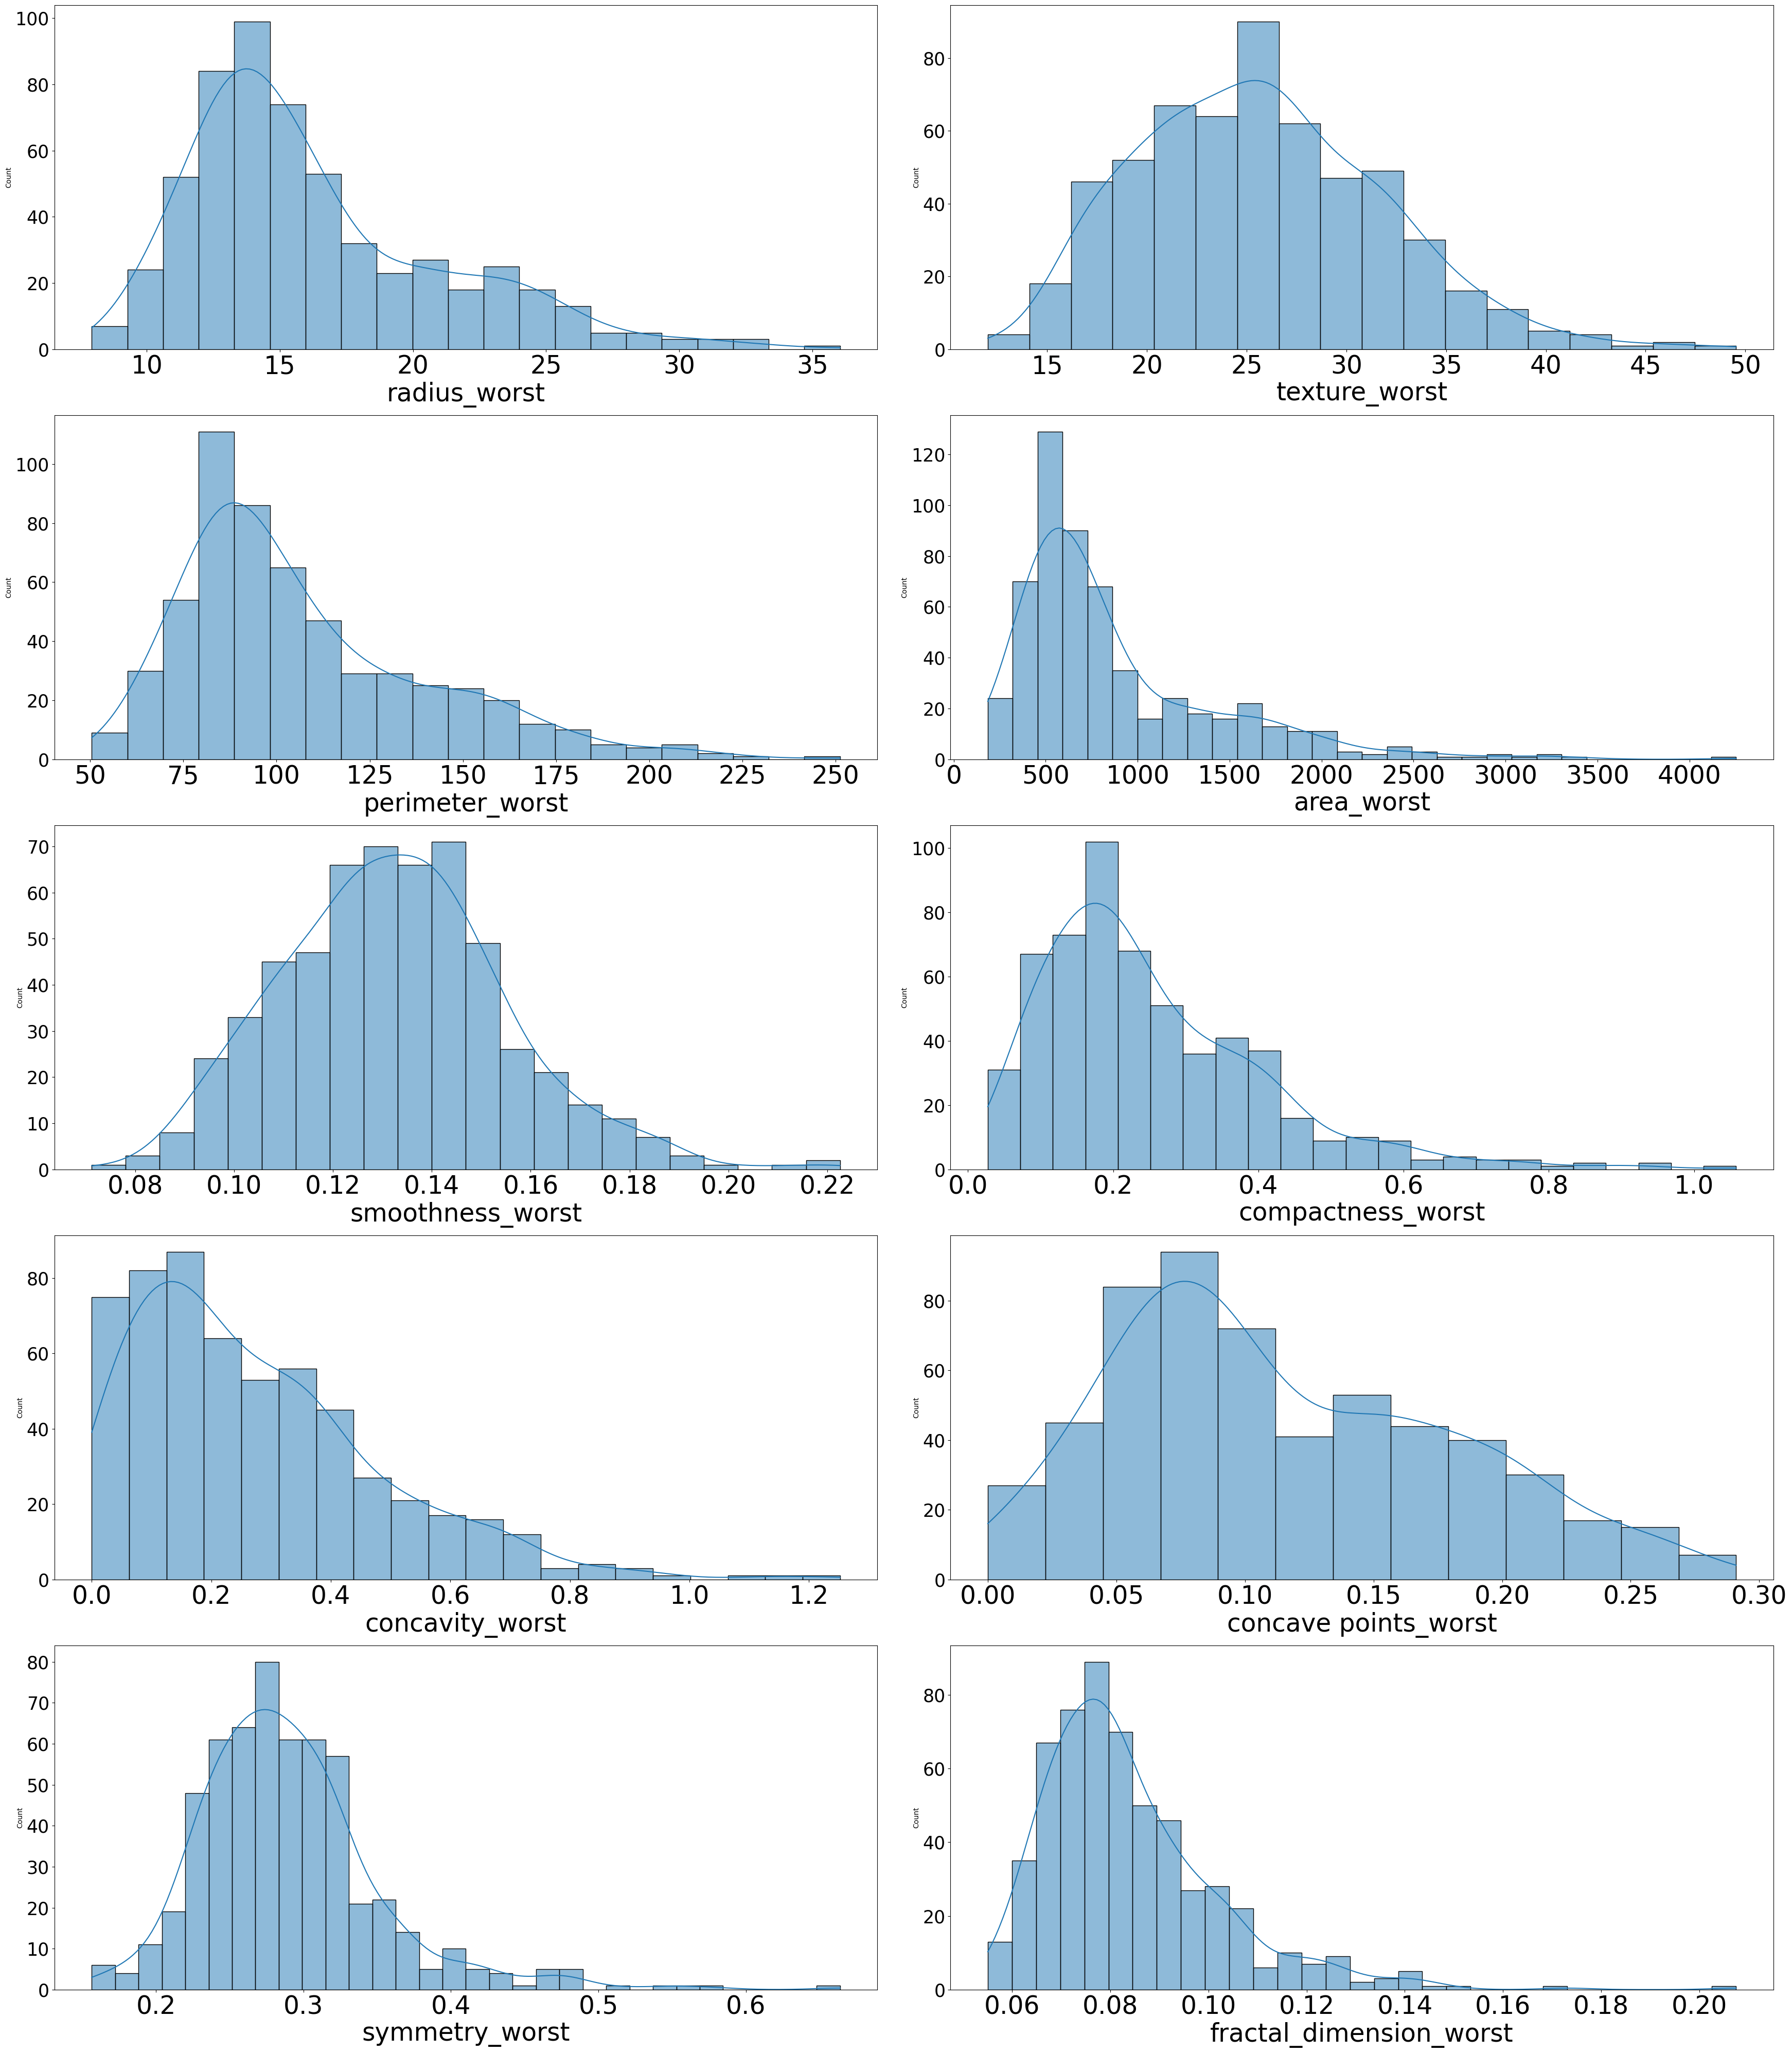

In [ ]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_div3.drop(columns = 'diagnosis').columns) :
    sns.histplot(x = col,data = df_div3 ,kde=True, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)

plt.tight_layout()
plt.show()

Dataset Scaling


to learn the dataset and fit and transform the values in 0-1 range then stored to variable X

In [ ]:
scaled=MinMaxScaler()            #The choice of scaling method depends on the characteristics of the dataset and the requirements of machine learning algorithm being used
X=scaled.fit_transform(X)

Train_Test_Split Dataset

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)        #Splitting the data into training and testing sets helps assess how well your model generalizes to unseen

Creating Classifier Instances

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
gu=GaussianNB()
ds=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ad=AdaBoostClassifier(random_state=1)
algo_accuracy = []

Creating A Machine Learning Model

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
models=[knn,sv,gu,ds,rf,ad]
algo_accuracy = []
for model in models:
  print("*********",model,"*******")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print('Accuracy score=',accuracy_score(y_test,y_pred))
  algo_accuracy.append(accuracy_score(y_test,y_pred)*100)

********* KNeighborsClassifier() *******
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy score= 0.9590643274853801
********* SVC() *******
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy score= 0.9649122807017544
********* GaussianNB() *******
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy    

Performance Evaluation

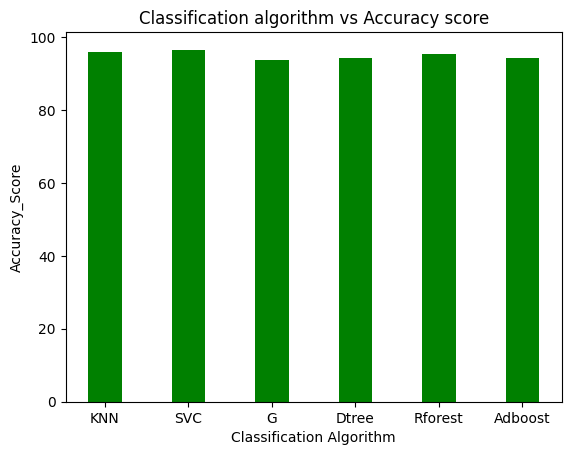

In [ ]:
algo=['KNN','SVC','G','Dtree','Rforest','Adboost']
plt.bar(algo,algo_accuracy,width=0.4,color='g')
plt.plot()
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy_Score')
plt.title('Classification algorithm vs Accuracy score')
plt.show()

**DecisionTreeClassifier & SVC have the best accuracy**

HYPER PARAMETER  TUNING

In [ ]:

sv1=SVC()
params={"kernel":["linear", "poly"],"C": [1.0, 10.0, 100.0],"gamma":[0.01, 0.1, 1, 10, 100]}     #kernal=Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used
clf1=GridSearchCV(sv1,params,cv=10,scoring='accuracy')                                            #C=Regularization parameter. The strength of the regularization is inversely proportional to C
clf1.fit(X_train,y_train)                                                                         #gamma=Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
print(clf1.best_params_)


ds1=DecisionTreeClassifier()
params={"criterion":["gini","entropy"],"max_depth":[1,2,None],"max_features":["auto","sqrt"]}         #criterion=The function to measure the quality of a split,Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
clf2=GridSearchCV(ds,params,cv=10,n_jobs=1)                                                            #max_depth=The maximum depth of the tree
clf2.fit(X_train,y_train)                                                                              #max_features=The number of features to consider when looking for the best split
print(clf2.best_params_)

{'C': 10.0, 'gamma': 0.01, 'kernel': 'linear'}
{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}


In [ ]:
sv_new=SVC(kernel="linear",gamma=0.01,C=1.0)
sv_new.fit(X_train,y_train)
y_pred=sv_new.predict(X_test)
y_pred
print(classification_report(y_test,y_pred))

ds_new=DecisionTreeClassifier(criterion="entropy", max_depth=None, max_features="auto")
ds_new.fit(X_train,y_train)
y_pred1=ds_new.predict(X_test)
y_pred1
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



# Oversampling

In [ ]:
#Oversampling is a technique used in the context of imbalanced datasets to balance the class distribution by increasing the number of instances in the minority class.
 #Imbalanced datasets occur when one class in a classification problem has significantly fewer instances than the other class(es), which can lead to biased models that perform poorly in predicting the minority class.

oversample=SMOTE(random_state=1)
X_os,y_os=oversample.fit_resample(X,y)

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,random_state=3,test_size=0.3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_os=scaler.fit_transform(X_train_os)
X_test_os=scaler.transform(X_test_os)

In [ ]:
algo1=[]
knn_os=KNeighborsClassifier()
sv_os=SVC()
nb_os=GaussianNB()
ds_os=DecisionTreeClassifier()
rf_os=RandomForestClassifier()
ad_os=AdaBoostClassifier(random_state=1)
algo_accuracy2=[]
l=[sv_os,knn_os,nb_os,ds_os,rf_os,ad_os]
for i in l:
  print('*********************************',i,'****************************************')
  i.fit(X_train_os,y_train_os)
  y_pred_os=i.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print('Accuracy=',accuracy_score(y_test_os,y_pred_os))
  algo_accuracy2.append(accuracy_score(y_test_os,y_pred_os)*100)

********************************* SVC() ****************************************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       118
           1       0.99      0.96      0.97        97

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215

Accuracy= 0.9767441860465116
********************************* KNeighborsClassifier() ****************************************
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.96      0.96      0.96        97

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215

Accuracy= 0.9627906976744186
********************************* GaussianNB() ****************************************
              precisi

Performance Evaluation Of Oversampling


algo1 = ['KNN', 'SVC', 'G', 'Dtree', 'Rforest', 'Adboost']

plt.bar(algo1, algo_accuracy2, width=0.4, color='g')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy Score')
plt.show()

# Under Sampling

In [ ]:
# Undersampling is a technique used in machine learning to address class imbalance in datasets. Unlike oversampling,Undersampling involves reducing the number of instances in the majority class to balance the class distribution.
Undersampler=RandomUnderSampler(random_state=1)
X_us,y_us=Undersampler.fit_resample(X,y)

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,random_state=3,test_size=0.3)

In [ ]:
X_train_us=scaler.fit_transform(X_train_us)
X_test_us=scaler.transform(X_test_us)

In [ ]:
algo2=[]
knn_us=KNeighborsClassifier()
sv_us=SVC()
nb_us=GaussianNB()
ds_us=DecisionTreeClassifier()
rf_us=RandomForestClassifier()
ad_os=AdaBoostClassifier(random_state=1)
alg_accuracy3=[]
l=[sv_us,knn_us,nb_us,ds_us,rf_us,ad_os]
for i in l:
  print('*********************************',i,'****************************************')
  i.fit(X_train_us,y_train_us)
  y_pred_us=i.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print('Accuracy=',accuracy_score(y_test_us,y_pred_us))
  alg_accuracy3.append(accuracy_score(y_test_us,y_pred_us)*100)

********************************* SVC() ****************************************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        64
           1       1.00      0.97      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128

Accuracy= 0.984375
********************************* KNeighborsClassifier() ****************************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.98      0.95      0.97        64

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128

Accuracy= 0.96875
********************************* GaussianNB() ****************************************
              precision    recall  f1-scor

Performance Evaluation Of Undersampling

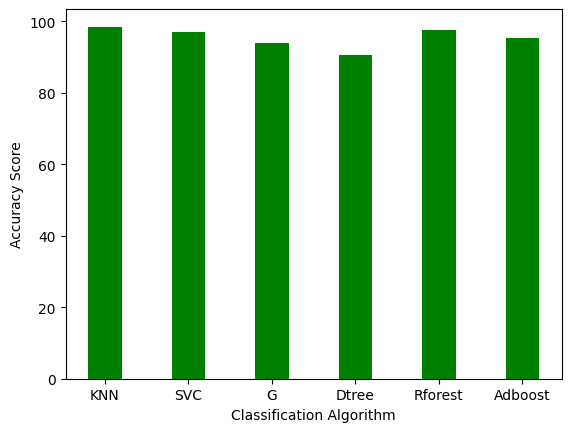

In [ ]:
algo2 = ['KNN', 'SVC', 'G', 'Dtree', 'Rforest', 'Adboost']
plt.bar(algo2,alg_accuracy3, width=0.4, color='g')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy Score')
plt.show()

 SVC have the best accuracy

In [ ]:
y_new=sv_us.predict(scaled.transform([[13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259]]))
y_new

array([0])

# Conclusion

In [ ]:
import pickle

from above observation it is noted that Support Vector Classifier with under rsampling have maximum accuracy,precision,f1-score and recall,while doing over sampling and hyperparameter tunning there is no improvement in above mentioned perfomace parameters

In [ ]:
filename = 'model.pkl'
pickle.dump(ad_os,open(filename,'wb'))

In [ ]:
scalername = 'minmax.pkl'
pickle.dump(scaler,open(scalername,'wb'))

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
!wget -q -O - - ipv4.icanhazip.com

34.168.41.66


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[#.................] - fetchMetadata: sill resolveWithNewModule follow-redirect

npx: installed 22 in 6.448s
your url is: https://fair-pets-smoke.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.41.66:8501

Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of user_input: 1
Length of us